# Projeto 2 Titanica Survived

## Esse projeto está dividido em X etapas.

  1. Intalação das dependências
  2. Importação das bibliotecas usadas
  1. EDA: Análise exploratória dos dados,
  2. Pré-processamento dos dados,
  3. Implementação da Rede Neural Multicamadas
  4. Análises finais

# 1. Intalação das dependências

In [9]:
!pip install pandas numpy matplotlib seaborn scikit-learn keras tensorflow

# 2. Importação das bibliotecas usadas

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# 3. EDA: Análise exploratória dos dados

In [3]:
train_data = pd.read_csv('/data/train.csv')
test_data = pd.read_csv('/data/test.csv')

## Informações gerais sobre o conjunto de treino e teste

In [10]:
print("Informações sobre o conjunto de treinamento:")
print(train_data.info())

Informações sobre o conjunto de treinamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### **Informações sobre Conjunto de Treinamento**
- **Número de entradas**: 891 registros (linhas).
- **Número de colunas**: 12 colunas (variáveis).
- **Dtypes (tipos de dados)**:
  - `float64`: 2 colunas (valores numéricos contínuos, como `Age` e `Fare`).
  - `int64`: 5 colunas (valores numéricos inteiros, como `PassengerId`, `Survived`, etc.).
  - `object`: 5 colunas (valores categóricos ou strings, como `Name`, `Sex`, etc.).
- **Colunas com valores ausentes**:
  - `Age`: 714 valores não nulos (177 valores ausentes).
  - `Cabin`: Apenas 204 valores não nulos (687 valores ausentes).
  - `Embarked`: 889 valores não nulos (2 valores ausentes).
- **Tamanho na memória**: ~83,7 KB.

Essas informações sugerem que:
- As colunas `Age`, `Cabin` e `Embarked` têm valores ausentes e podem necessitar de tratamento.
- A coluna `Cabin` possui uma proporção muito alta de valores ausentes (quase 77%), o que pode justificar sua exclusão dependendo da análise.

In [5]:
print("Informações sobre o conjunto de teste:")
print(test_data.info())

Informações sobre o conjunto de teste:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


### **Informações sobre o Conjunto de Teste**
- **Número de entradas**: 418 registros (linhas).
- **Número de colunas**: 11 colunas (uma a menos que o conjunto de treinamento, pois a coluna `Survived` não está presente, já que esse é o valor a ser predito).
- **Dtypes (tipos de dados)**:
  - `float64`: 2 colunas (valores numéricos contínuos, como `Age` e `Fare`).
  - `int64`: 4 colunas (valores numéricos inteiros, como `PassengerId`, `Pclass`, etc.).
  - `object`: 5 colunas (valores categóricos ou strings, como `Name`, `Sex`, etc.).
- **Colunas com valores ausentes**:
  - `Age`: 332 valores não nulos (86 valores ausentes).
  - `Fare`: 417 valores não nulos (1 valor ausente).
  - `Cabin`: Apenas 91 valores não nulos (327 valores ausentes).
- **Tamanho na memória**: ~36,0 KB.

Essas informações sugerem que:
- A coluna `Age` também apresenta valores ausentes significativos.
- A coluna `Cabin` tem ainda mais valores ausentes proporcionalmente do que no conjunto de treinamento.
- A única coluna com apenas um valor ausente é `Fare`, e ela pode ser facilmente tratada por imputação.

## Analise dos valores ausentes

In [6]:
print("\nValores ausentes por coluna:")
print(train_data.isnull().sum())


Valores ausentes por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Explicação:

* As colunas 'Age (177) e 'Cabin'(687), possuem uma quantidade significativa de valores ausentes.
* O restante das outras colunas, não possuem valores ausentes

## Visualização da distribuição de sobrevivência

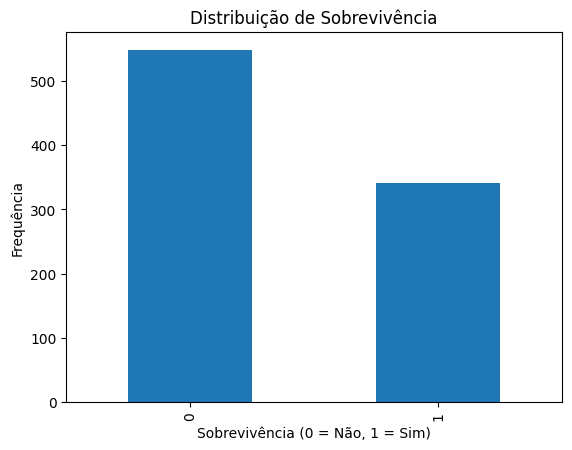

In [ ]:
train_data['Survived'].value_counts().plot(kind='bar', title='Distribuição de Sobrevivência')
plt.xlabel("Sobrevivência (0 = Não, 1 = Sim)")
plt.ylabel("Frequência")
plt.show()

## Visualização da distribuição por classe

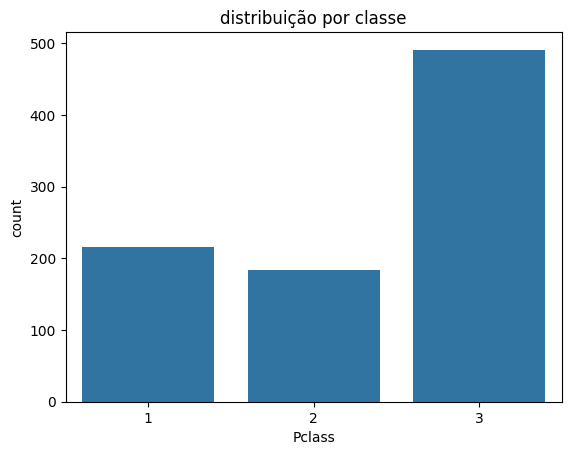

In [ ]:
sns.countplot(data=train_data, x='Pclass')
plt.title("distribuição por classe")
plt.show()

## Visualizaçaõ da distribuiçao por sexo

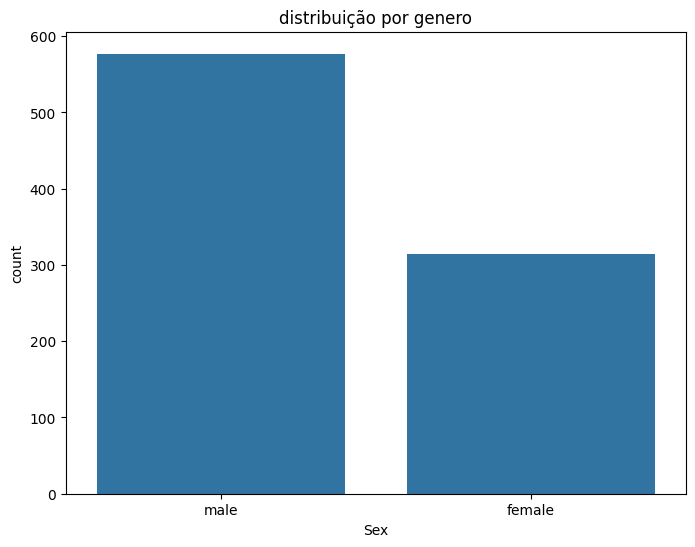

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Sex')
plt.title("distribuição por genero")
plt.show()

## Visualização da distribuição por idade

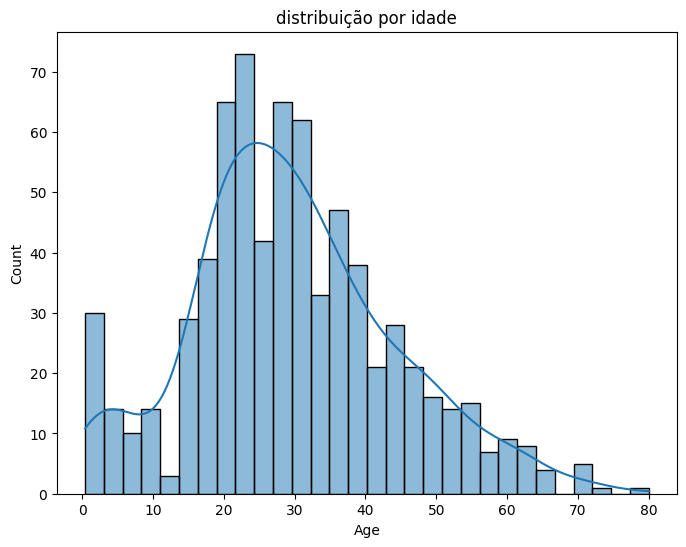

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Age', kde=True, bins=30)
plt.title("distribuição por idade")
plt.show()

## Analise da relação entre todas a variavel sexo e sobreviente

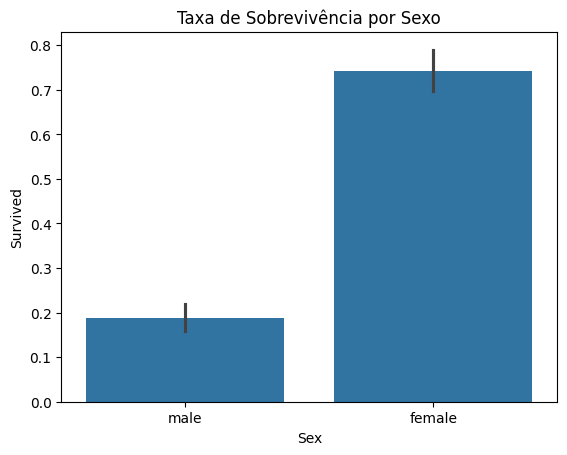

In [ ]:
sns.barplot(data=train_data, x='Sex', y='Survived')
plt.title("Taxa de Sobrevivência por Sexo")
plt.show()

## Analise da relação entre todas a variavel Classe: e sobreviente

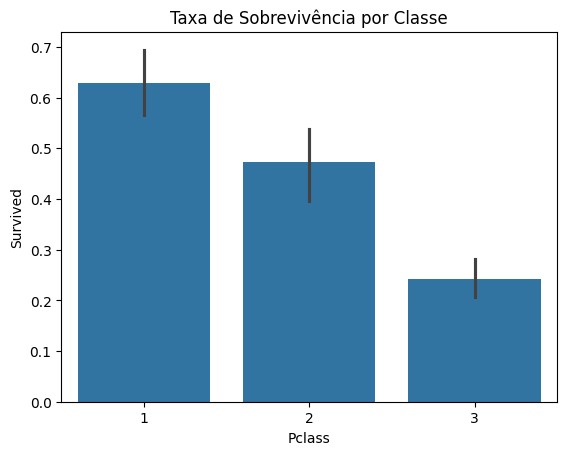

In [ ]:
sns.barplot(data=train_data, x='Pclass', y='Survived')
plt.title("Taxa de Sobrevivência por Classe")
plt.show()

## Visualizar matriz de correlação

In [ ]:
numeric_data = train_data.select_dtypes(include=[np.number])

In [ ]:
corr_matrix = numeric_data.corr()

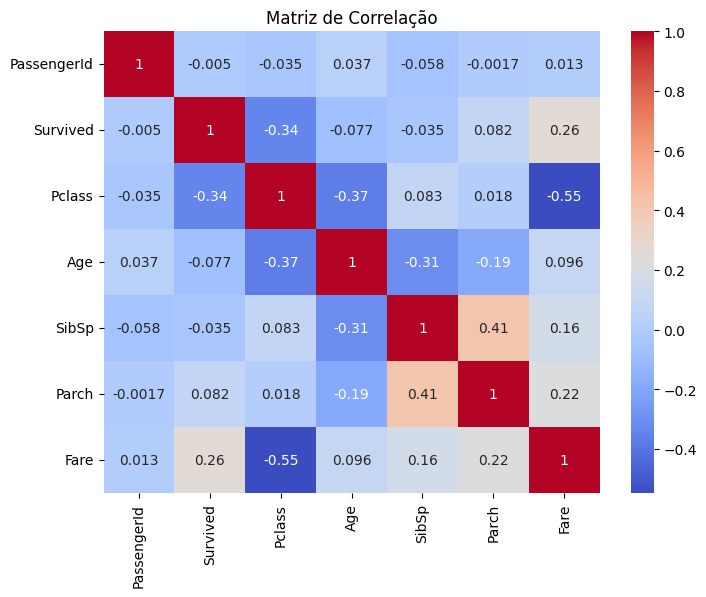

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

## Analise final dos dados

- Passageiros de 1ª classe têm maior chance de sobrevivência.
- Mulheres têm maior probabilidade de sobreviver do que homens.
- Passageiros com tarifas mais altas tendem a sobreviver.
- Famílias muito grandes ou passageiros sozinhos têm menos chances de sobreviver.


# 2. Pré-processamento dos dados

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop=['Name', 'Ticket', 'Cabin', 'PassengerId']):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(self.columns_to_drop, axis=1, errors="ignore")


In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder_sex = OneHotEncoder(drop='first', sparse_output=False)
        self.encoder_embarked = OneHotEncoder(drop='first', sparse_output=False)

    def fit(self, X, y=None):
        # Ajusta os encoders nas colunas Sex e Embarked
        self.encoder_sex.fit(X[['Sex']])
        self.encoder_embarked.fit(X[['Embarked']])
        return self

    def transform(self, X):
        # Codificar 'Sex'
        sex_encoded = self.encoder_sex.transform(X[['Sex']])
        sex_encoded_df = pd.DataFrame(sex_encoded, columns=self.encoder_sex.get_feature_names_out(['Sex']), index=X.index)

        # Codificar 'Embarked'
        embarked_encoded = self.encoder_embarked.transform(X[['Embarked']])
        embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=self.encoder_embarked.get_feature_names_out(['Embarked']), index=X.index)

        # Concatena as novas colunas codificadas e remove as originais
        X = pd.concat([X, sex_encoded_df, embarked_encoded_df], axis=1)
        return X.drop(['Sex', 'Embarked'], axis=1)


In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X


# 3. Implementação da Rede Neural Multicamadas


In [15]:
X = train_data.drop('Survived', axis=1)  # 'Survived' é a variável alvo
y = train_data['Survived']

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessor = Pipeline(steps=[
    ('age_imputer', AgeImputer()),            # Imputa valores ausentes na coluna Age
    ('feature_encoder', FeatureEncoder()),    # Codifica Sex e Embarked
    ('feature_dropper', FeatureDropper()),    # Remove colunas irrelevantes
    ('scaler', StandardScaler())              # Escala variáveis numéricas
])

## Aplica o treinamento nos dados pré-processados




In [17]:
X_train_processed = preprocessor.fit_transform(X)
X_test_processed = preprocessor.transform(test_data)

### Salvar vetorizados em arquivos pkl e csv

In [27]:
try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    feature_names = ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# Criar DataFrames com as colunas transformadas
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

# Salvar o treino pré-processado em CSV e PKL
X_train_processed_df.to_csv('X_train_processed.csv', index=False)
with open('X_train_processed.pkl', 'wb') as f:
    pickle.dump(X_train_processed_df, f)

# Salvar o teste pré-processado em CSV e PKL
X_test_processed_df.to_csv('data_processed/X_test_processed.csv', index=False)
with open('data_processed/X_test_processed.pkl', 'wb') as f:
    pickle.dump(X_test_processed_df, f)


## Dividir os dados de treino em trino e validação

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X_train_processed, y, test_size=0.2, random_state=42)

#### Visualiza o shape dos dados

In [31]:
X_train.shape

(712, 9)

In [33]:
X_val.shape

(179, 9)

In [34]:
y_train.shape

(712,)

In [35]:
y_val.shape

(179,)

## Definir o modelo MLP com camada Input

In [36]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Camada de entrada explicitamente definida
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Saída com função de ativação sigmoide para classificação binária
])


## Compilar o modelo

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Após a compilação, o modelo está pronto para ser treinado com o método fit, onde ele ajustará os pesos com base na função de perda e tentará maximizar a métrica de precisão (ou outra métrica, se definida).

## Treina o modelo

In [37]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3778 - loss: 0.7130 - val_accuracy: 0.6872 - val_loss: 0.6570
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6552 - loss: 0.6495 - val_accuracy: 0.7598 - val_loss: 0.6059
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7833 - loss: 0.6036 - val_accuracy: 0.8101 - val_loss: 0.5372
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7938 - loss: 0.5328 - val_accuracy: 0.8045 - val_loss: 0.4689
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8143 - loss: 0.4731 - val_accuracy: 0.8101 - val_loss: 0.4247
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7976 - loss: 0.4447 - val_accuracy: 0.7989 - val_loss: 0.4103
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8214 - loss: 0.4242 - val_accuracy: 0.8101 - val_loss: 0.4074
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7950 - loss: 0.4607 - val_accuracy: 0.7989 - val_loss

## Avaliação do modelo

### Curva do erro

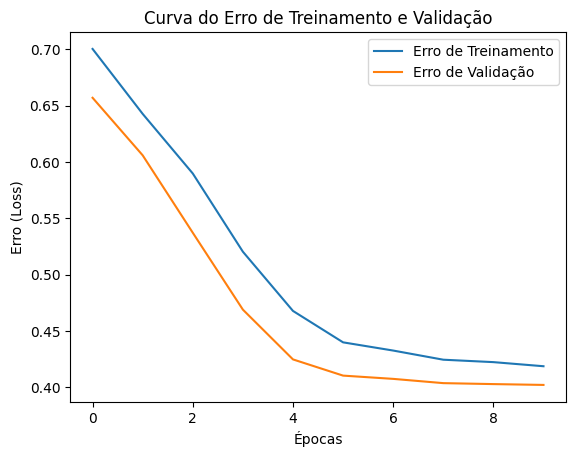

In [39]:
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro (Loss)')
plt.legend()
plt.title("Curva do Erro de Treinamento e Validação")
plt.show()

### Curva de acurácia

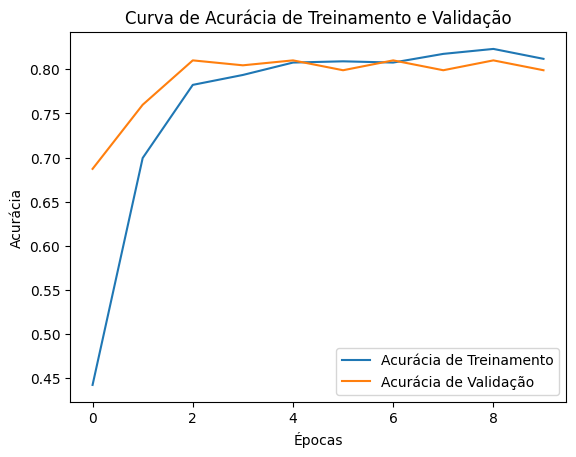

In [47]:
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title("Curva de Acurácia de Treinamento e Validação")
plt.show()


# Fazer previsões no conjunto de validação

In [42]:
y_pred = (model.predict(X_val) > 0.5).astype("int")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


## Calcular e exibir a matriz de confusão


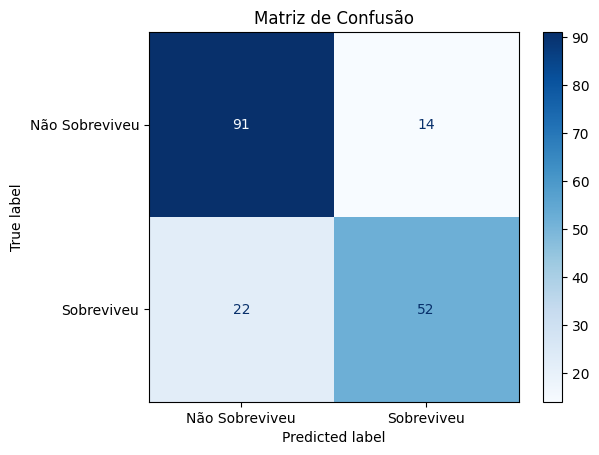

In [43]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Sobreviveu", "Sobreviveu"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()

## Faz a previsão no conjunto de teste

In [44]:
y_test_pred = (model.predict(X_test_processed) > 0.5).astype("int")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


### Criar um df com as previsões

In [45]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_test_pred.flatten()
})

## Salvar o arquivo de submissão

In [46]:
submission.to_csv("data_predicted/submission_survived_pred.csv", index=False)

# 4. Análises finais